<a href="https://colab.research.google.com/github/PManiAwasthi/IIITH-FMML-course-Assignments/blob/main/Lab1_Features_FMML20210268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 4 October 2021 Monday <br>



Answer to the assingment questions are at the end of this notebook.

In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import numpy as np
import plotly.express as px
import pandas as pd


  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=661bd71422f69dbb29209372e2181c4b479ae193142cd39cc86ac280547a1669
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features. 

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'Éléphant de savane d\'Afrique et l\'Éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« Éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'Éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας signifiant « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffegiraffaisanafricanartiodactylmammalthetallestlivingterrestrialanimalandthelargestruminantitistraditionallyconsideredtobeonespeciesgiraffacamelopardaliswithninesubspecieshowevertheexistenceofuptonineextantgiraffespecieshasbeendescribedbaseduponresearchintothemitochondrialandnucleardnaaswellasmorphologicalmeasurementsofgiraffasevenotherprehistoricspeciesknownfromfossilsareextinctthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsdistinctivecoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheiroffspringorbachelorherdsof

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on. 

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

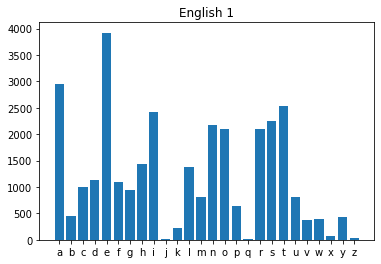

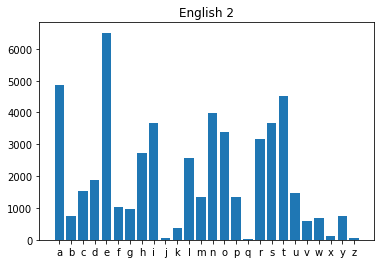

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

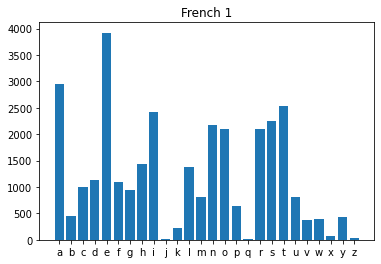

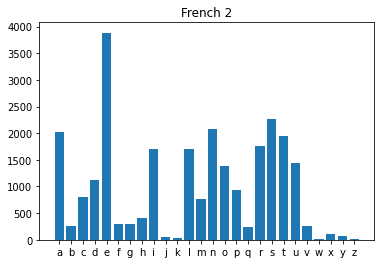

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

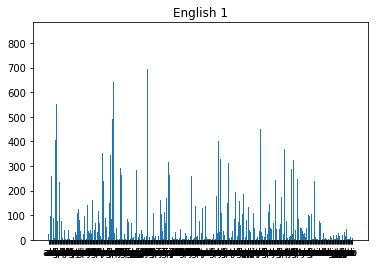

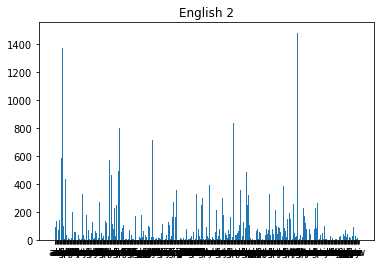

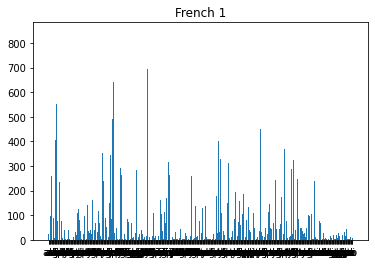

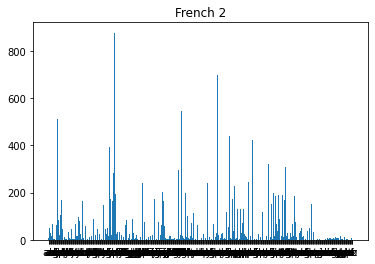

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

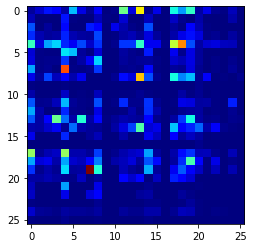

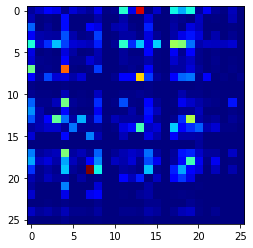

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

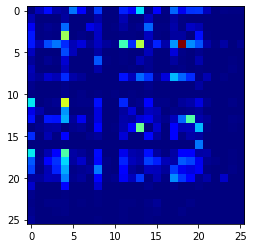

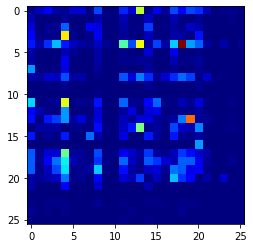

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text. 

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')


In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

English 2:
('t', 'h') : 1479.0
('a', 'n') : 1367.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 801.0
('e', 's') : 752.0
('r', 'e') : 750.0
('l', 'e') : 724.0
('h', 'a') : 716.0

French 1:
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 276.0
('r', 'a') : 230.0
('l', 'a') : 228.0

French 2:
('e', 's') : 878.0
('n', 't') : 697.0
('d', 'e') : 583.0
('e', 'n') : 564.0
('l', 'e') : 547.0
('a', 'n') : 512.0
('o', 'n') : 440.0
('r', 'e') : 423.0
('e', 'l') : 392.0
('s', 'e') : 321.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics. 

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

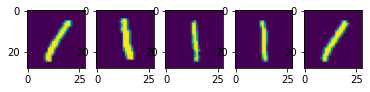

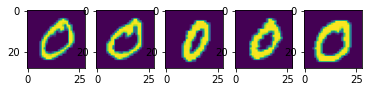

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

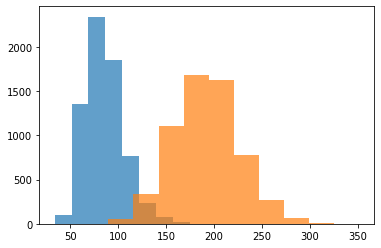

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole




Visualize a few:

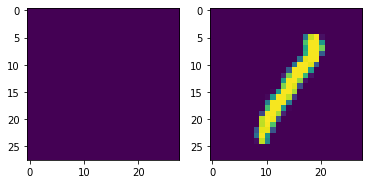

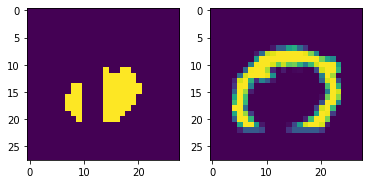

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

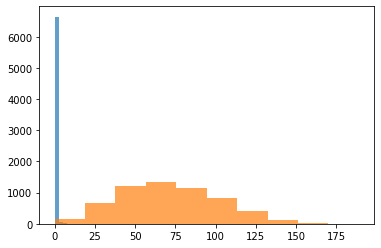

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero. 


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull


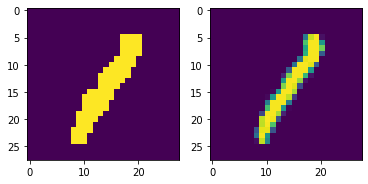

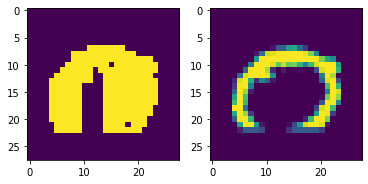

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

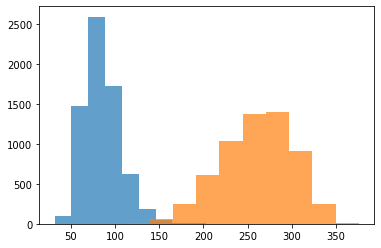

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

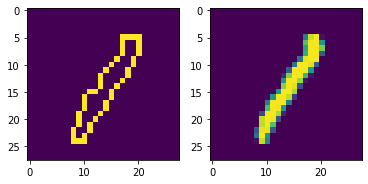

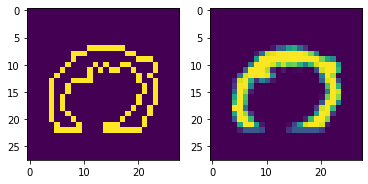

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

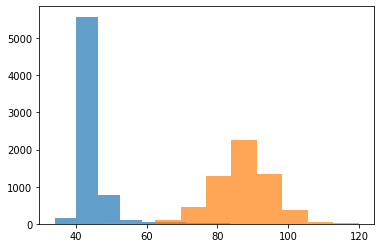

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together? 

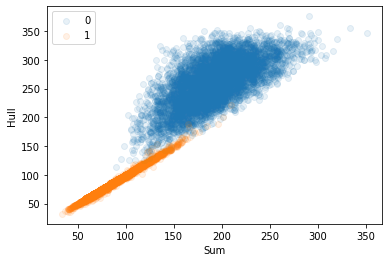

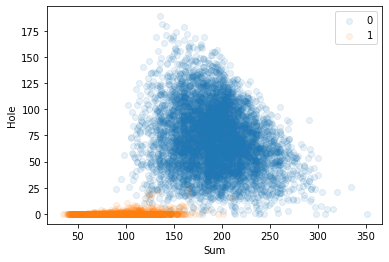

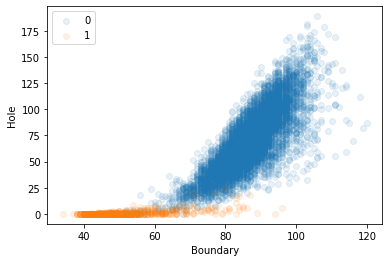

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse. 


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

**Part 1 Answer 1**
**Using the same method discussed in part 1 for features on different langages**

Here i have made a function to directly make the ngram we want and plot it, just so that we can save a lot of repeating codes.
The function takes in 3 parameters listNames for the name of the plots, listValues which are the values that we obtained after cleaning the data, and the type of ngram we want.
It gives output the side by side plot comparision of the languages on the basis of ngram values.

In [ ]:
def makeNGrams(listNames,listValues, n):
  nGramDict = {}
  for i in range(len(listNames)):
    j = listValues[i]
    nGramDict[listNames[i]] = Counter(ngrams(j,n))
  plotSideBySide(nGramDict)


def plotSideBySide(ngramDict):
  count = 1
  for key, values in ngramDict.items():
    if count % 2 != 0:
      plt.figure(figsize=(16,8))
      plt.subplot(1,2,1)
      plothistogram(values)
      plt.title(key)
    else:
      plt.subplot(1,2,2)
      plothistogram(values)
      plt.title(key)
      plt.show()
    count+=1

In [ ]:
#all the necessary function in one block
def cleanup(text):
  text = text.lower()
  text = re.sub('[^a-z]+', '',text)
  return text

# function to convert the tuple to string
def tuple2string(tup):
  sr = ""
  for ii in tup:
    sr = ii + sr
  return sr
#to convert the tuple of tuples to a list
def key2string(keys):
  return [tuple2string(i) for i in keys]
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x:x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  # plt.imshow(freq, cmap = 'jet')
  return freq

def plottrihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      for kk in range(26):
        freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj), chr(ord('a')+kk))]
  return freq

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  return freq

#function for trigram
def ind2tuptri(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  k = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j), chr(ord('a')+k))

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

#function for trigram
def ShowTopNTri(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tuptri(arg[ii])} : {f[arg[ii]]}')

In [ ]:
#getting language italian and english
topic1 = 'Giraffe'
topic2 = 'Elephant'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('it')
it1 = wikipedia.page(topic1).content
it2 = wikipedia.page(topic2).content

In [ ]:
#cleaning up symbols, spaces, new lines, tabs, etc. to keep only the characters
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
it1 = cleanup(fr1)
it2 = cleanup(fr2)

Visualising the unigram and observing the features.

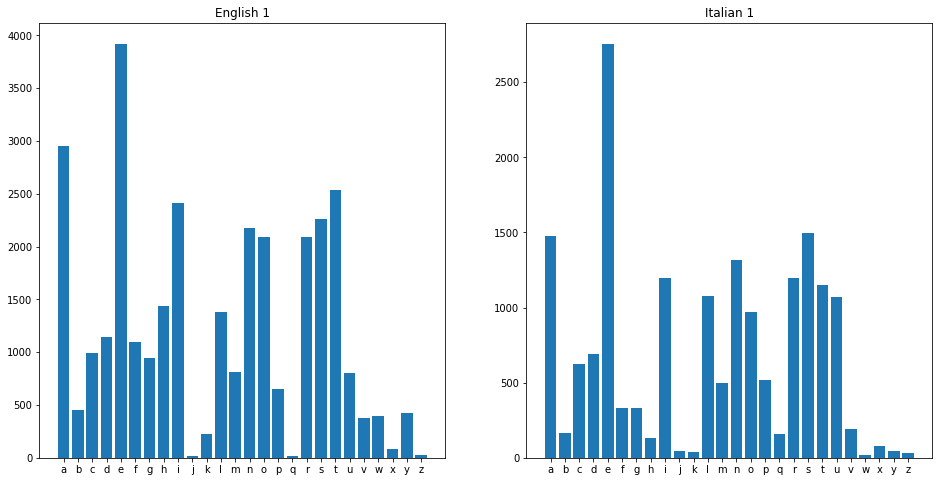

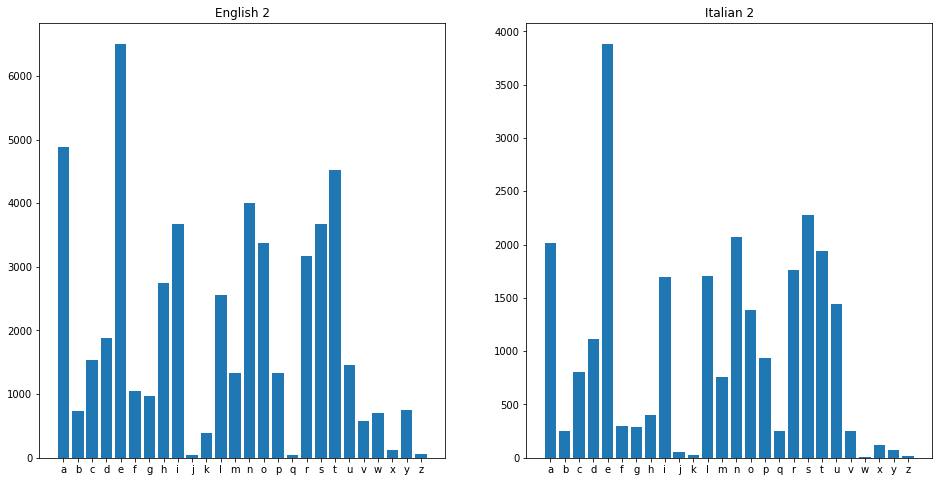

In [ ]:
listNames = ["English 1", "Italian 1", "English 2", "Italian 2"]
listValues = [eng1, it1, eng2, it2]
makeNGrams(listNames, listValues, 1)

Lets try bigrams as unigram doesn't show promising results.

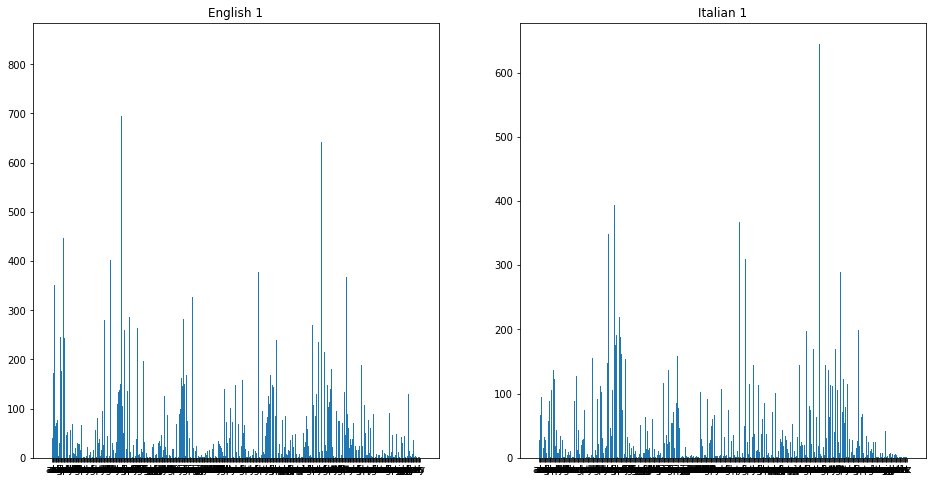

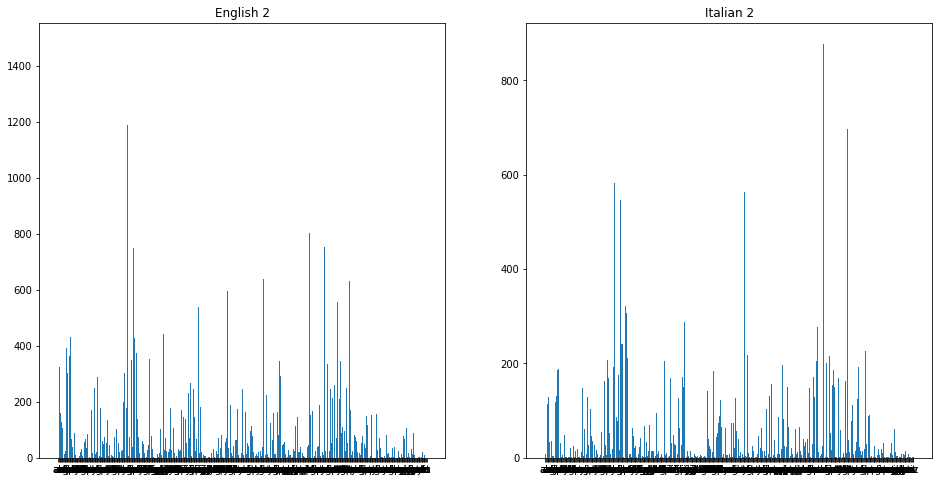

In [ ]:
makeNGrams(listNames, listValues, 2)

In [ ]:
def printBiVal(listNames, listValues, n):
  for i in range(len(listNames)):
    print(listNames[i])
    ShowTopN(plotbihistogram(Counter(ngrams(listValues[i],n))))
    print()
printBiVal(listNames, listValues, 2)

English 1
('t', 'h') : 842.0
('h', 'e') : 695.0
('e', 's') : 643.0
('i', 'n') : 592.0
('a', 'n') : 552.0
('e', 'r') : 493.0
('r', 'e') : 450.0
('r', 'a') : 446.0
('a', 'l') : 406.0
('n', 'd') : 402.0

Italian 1
('e', 's') : 645.0
('l', 'e') : 394.0
('e', 'n') : 367.0
('d', 'e') : 349.0
('o', 'n') : 309.0
('n', 't') : 289.0
('r', 'e') : 289.0
('e', 'l') : 276.0
('r', 'a') : 230.0
('l', 'a') : 228.0

English 2
('t', 'h') : 1479.0
('a', 'n') : 1367.0
('h', 'e') : 1190.0
('i', 'n') : 1014.0
('n', 't') : 833.0
('e', 'r') : 801.0
('e', 's') : 752.0
('r', 'e') : 750.0
('l', 'e') : 724.0
('h', 'a') : 716.0

Italian 2
('e', 's') : 878.0
('n', 't') : 697.0
('d', 'e') : 583.0
('e', 'n') : 564.0
('l', 'e') : 547.0
('a', 'n') : 512.0
('o', 'n') : 440.0
('r', 'e') : 423.0
('e', 'l') : 392.0
('s', 'e') : 321.0



for trigram

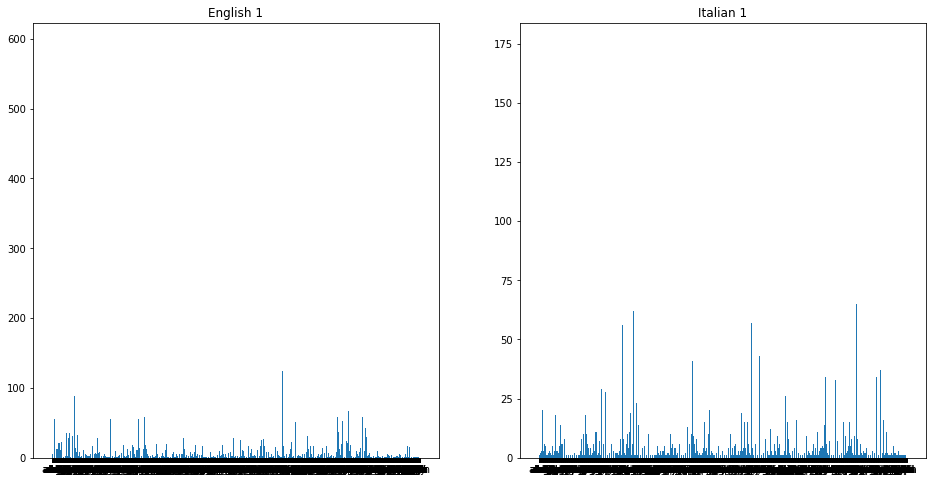

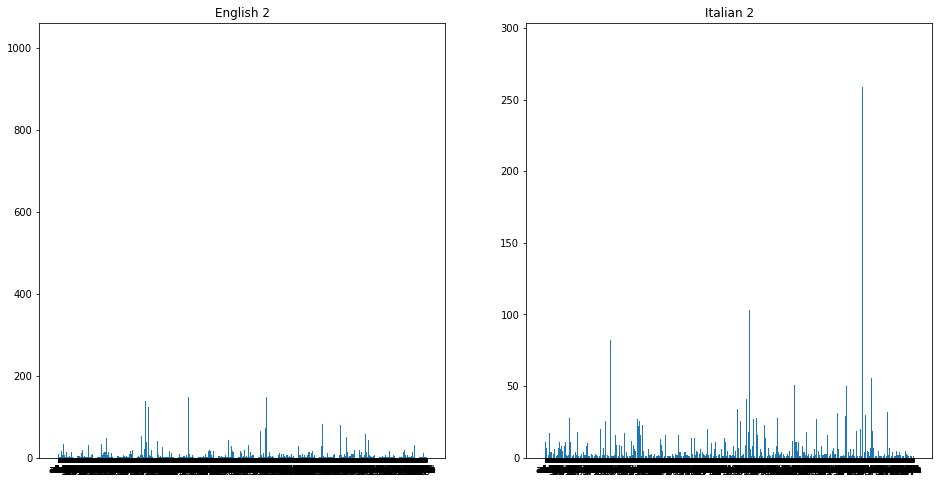

In [ ]:
makeNGrams(listNames, listValues, 3)

In [ ]:
def printTriVal(listNames, listValues, n):
  for i in range(len(listNames)):
    print(listNames[i])
    ShowTopNTri(plottrihistogram(Counter(ngrams(listValues[i],n))))
    print()

printTriVal(listNames, listValues, 3)

English 1
('s', 'i', 'i') : 7.0
('a', 'n', 'n') : 3.0
('i', 'n', 'n') : 2.0
('n', 'd', 'd') : 2.0
('r', 'd', 'd') : 1.0
('e', 'n', 'n') : 1.0
('a', 'y', 'y') : 1.0
('l', 'i', 'i') : 1.0
('e', 'e', 'e') : 1.0
('e', 'd', 'd') : 1.0

Italian 1
('h', 'e', 'e') : 4.0
('a', 'n', 'n') : 3.0
('b', 'e', 'e') : 2.0
('m', 'o', 'o') : 2.0
('l', 'a', 'a') : 2.0
('u', 'x', 'x') : 1.0
('r', 'i', 'i') : 1.0
('u', 'n', 'n') : 1.0
('e', 'r', 'r') : 1.0
('e', 's', 's') : 1.0

English 2
('s', 'i', 'i') : 12.0
('i', 'n', 'n') : 5.0
('n', 'd', 'd') : 3.0
('l', 'i', 'i') : 3.0
('a', 'n', 'n') : 3.0
('o', 'f', 'f') : 2.0
('r', 'i', 'i') : 2.0
('i', 'a', 'a') : 2.0
('m', 'o', 'o') : 2.0
('r', 'a', 'a') : 2.0

Italian 2
('h', 'e', 'e') : 7.0
('n', 'e', 'e') : 2.0
('l', 'a', 'a') : 1.0
('i', 'n', 'n') : 1.0
('e', 's', 's') : 1.0
('e', 't', 't') : 1.0
('r', 's', 's') : 1.0
('d', 'i', 'i') : 1.0
('m', 'a', 'a') : 1.0
('u', 'n', 'n') : 1.0



There will be problem when we try to do the same with the languages which different in number of alphabets or have different set of symbol that they use in the language like in hindi we have completely different set of symbols that we use for alphabets instead of using the english alphabets. As even the output of the wikipedia page content is encoded in hindi not the english version of the hindi content

**Part 1 Answer 2**
**Using different topics instead of similar once**

Here i have used 2 topics India Railway and African forest for the experiment

In [ ]:
topic1 = 'Indian Railway'
topic2  = 'African forest'
wikipedia.set_lang('en')
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('fr')
fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

In [ ]:
#cleaning up the data
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
listNames = ["English 1","French 1", "English 2", "French 2"]
listValues = [eng1, fr1, eng2, fr2]

First lets try with unigram

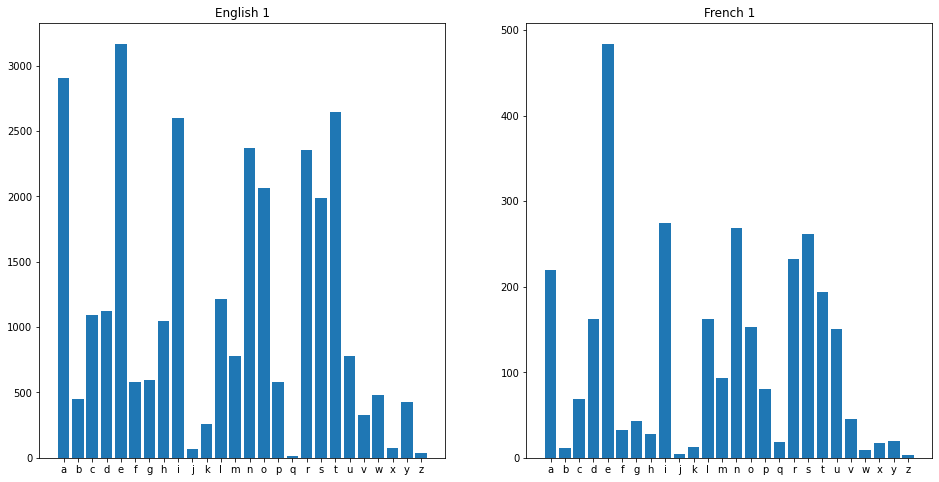

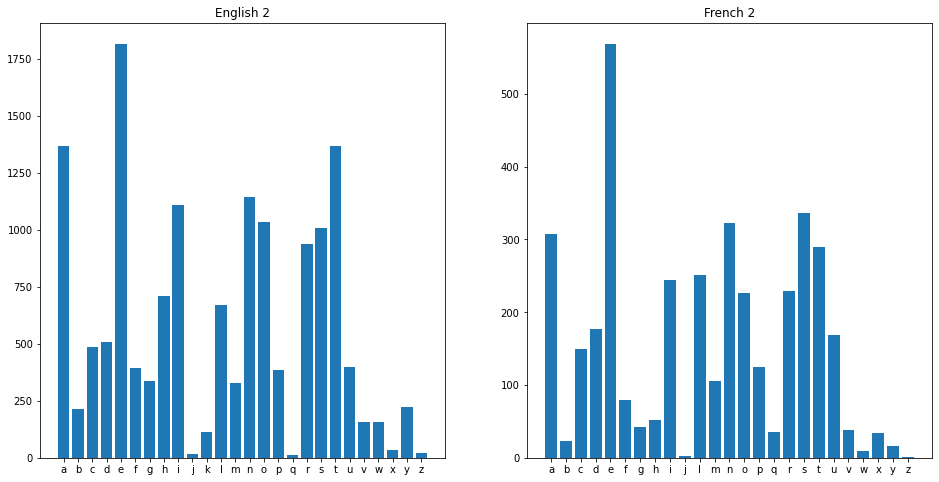

In [ ]:
makeNGrams(listNames, listValues, 1)

Again not much differnce to be seen for the unigrams lets try bigrams

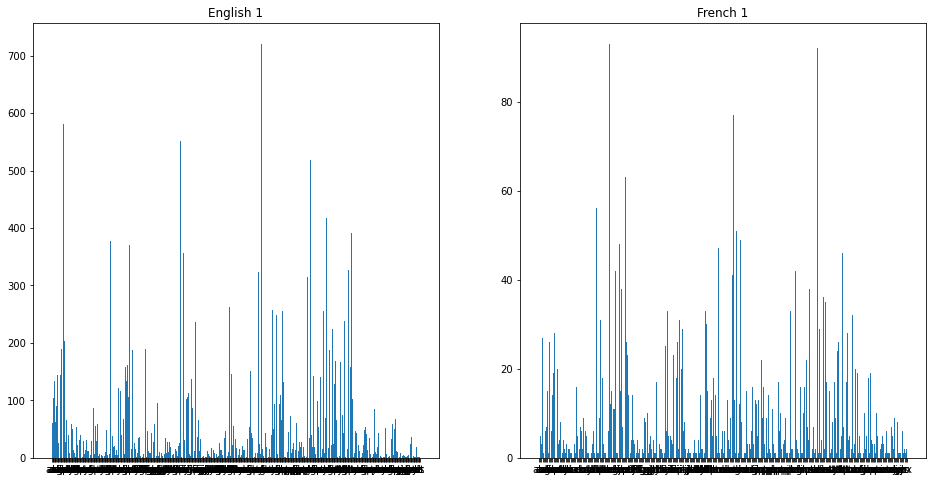

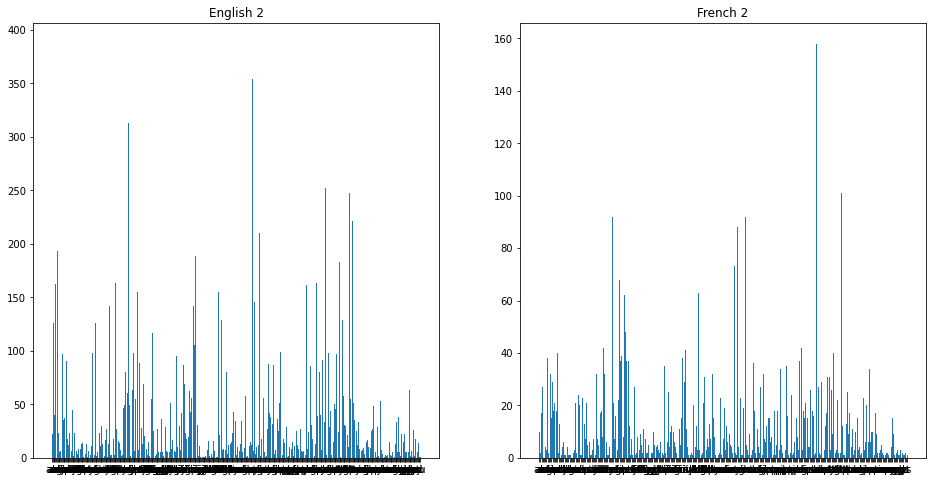

In [ ]:
makeNGrams(listNames, listValues, 2)

using the discreate values of bigram

In [ ]:
printBiVal(listNames, listValues, 2)

English 1
('i', 'n') : 721.0
('r', 'a') : 581.0
('t', 'h') : 552.0
('e', 'r') : 518.0
('a', 'n') : 517.0
('o', 'n') : 473.0
('h', 'e') : 444.0
('t', 'i') : 422.0
('e', 's') : 418.0
('s', 't') : 391.0

French 1
('d', 'e') : 93.0
('e', 's') : 92.0
('e', 'n') : 77.0
('s', 'e') : 63.0
('n', 'd') : 56.0
('r', 'e') : 52.0
('i', 'n') : 51.0
('o', 'n') : 49.0
('l', 'e') : 48.0
('e', 'm') : 47.0

English 2
('t', 'h') : 387.0
('a', 'n') : 354.0
('h', 'e') : 313.0
('i', 'n') : 304.0
('r', 'e') : 254.0
('e', 's') : 252.0
('n', 't') : 247.0
('s', 't') : 221.0
('o', 'n') : 210.0
('e', 'r') : 199.0

French 2
('e', 's') : 158.0
('n', 't') : 101.0
('d', 'e') : 92.0
('o', 'n') : 92.0
('e', 'n') : 88.0
('a', 'n') : 73.0
('l', 'e') : 68.0
('e', 'l') : 63.0
('r', 'e') : 62.0
('s', 'e') : 48.0



similarites between similar language and difference between different languages can be seen using the bigram.

Now lets try trigram

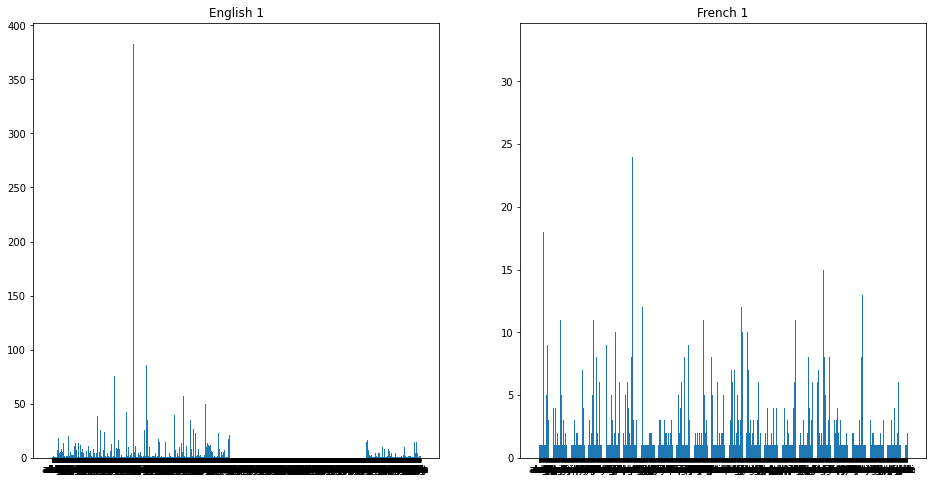

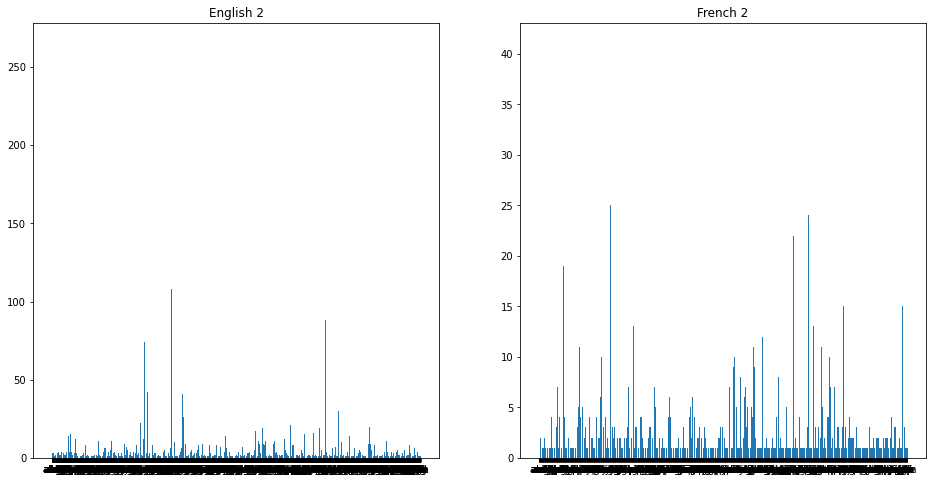

In [ ]:
makeNGrams(listNames, listValues, 3)

In [ ]:
printTriVal(listNames, listValues, 3)

English 1
('r', 'i', 'i') : 6.0
('n', 'i', 'i') : 5.0
('g', 'a', 'a') : 3.0
('h', 'e', 'e') : 3.0
('t', 'i', 'i') : 3.0
('l', 'i', 'i') : 2.0
('v', 'h', 'h') : 2.0
('e', 't', 't') : 2.0
('s', 'i', 'i') : 2.0
('m', 'e', 'e') : 1.0

French 1
('i', 'x', 'x') : 2.0
('e', 'n', 'n') : 1.0
('r', 'e', 'e') : 0.0
('r', 'f', 'f') : 0.0
('r', 'g', 'g') : 0.0
('r', 'h', 'h') : 0.0
('r', 'i', 'i') : 0.0
('r', 'j', 'j') : 0.0
('r', 'k', 'k') : 0.0
('r', 'l', 'l') : 0.0

English 2
('n', 'i', 'i') : 4.0
('s', 'i', 'i') : 4.0
('e', 'i', 'i') : 3.0
('o', 'd', 'd') : 2.0
('l', 'i', 'i') : 2.0
('e', 'd', 'd') : 1.0
('r', 'i', 'i') : 1.0
('l', 'o', 'o') : 1.0
('t', 'd', 'd') : 1.0
('s', 'd', 'd') : 1.0

French 2
('e', 's', 's') : 1.0
('a', 'a', 'a') : 0.0
('r', 'e', 'e') : 0.0
('r', 'f', 'f') : 0.0
('r', 'g', 'g') : 0.0
('r', 'h', 'h') : 0.0
('r', 'i', 'i') : 0.0
('r', 'j', 'j') : 0.0
('r', 'k', 'k') : 0.0
('r', 'l', 'l') : 0.0



here the trigram isn't helping as much as the bigram.

therefore we can say that this type of feature extraction can work even when the topics are different of those 2 languages. But may differ on some topics.

When we use different sources we may get different observations as the way in which we write in a language also differs from person to person so using  the ngrams on different source than wikipedia my or may not work depending upon how standard language content the other source uses. Content closer to standard language will help in better differences.

**Part 1 Answer 3**
**visualising trigrams and ngrams**

In [ ]:
def makeNGrams(listNames,listValues, n):
  nGramDict = {}
  for i in range(len(listNames)):
    j = listValues[i]
    nGramDict[listNames[i]] = Counter(ngrams(j,n))
  plotSideBySide(nGramDict)


def plotSideBySide(ngramDict):
  count = 1
  for key, values in ngramDict.items():
    if count % 2 != 0:
      plt.figure(figsize=(16,8))
      plt.subplot(1,2,1)
      plothistogram(values)
      plt.title(key)
    else:
      plt.subplot(1,2,2)
      plothistogram(values)
      plt.title(key)
      plt.show()
    count+=1

we can use the above function to draw the trigrams and ngrams. I have not worked with visualisation much so I tried the visualisations using the histogram. This same function can work for ngrams

**Part 2 Answer 1**
**The best combination**

for the case of 0 and 1 the hull and sum combination is the best in comparision with other features, as using it we can differentiate the numbers pretty well. Even when we use different numbers the performance as compard to other combination, the hull and sum combination still perform well.

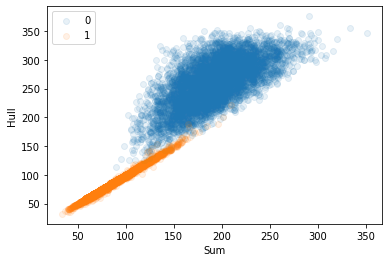

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

The combination of hole, sum and boundary is also a good combination for differentiate between the 2 numbers

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

**Part2 Answer 2**
**testing 4 or more features and visualise those features**

We cannot directly plot 4 or more feature but we can test or visualise them by applying them in the plot in a different fashion than using them as axis.
for example in 
1. scatter 3d plot we can add another feature to define the color high low value (darker to lighter or lighter to darker) for ploting 4th feature.
2. scatter 3d plot we can also change the size of the points on the basis of the feature using this we can add another feature.
3. we can also change the blob that we are using to visualise the points we can use different shapes for different range or category values of the newly added feature to visualise.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)), np.concatenate((sum1,sum0)), 
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)), np.concatenate((listnew0,listnew1)) )),
               columns =['Hole', 'Sum', 'Boundary', 'Class', 'Mean'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', size=df["Mean"])
fig.show()

**Part 2 Answer 3**
**more features for images**

Mean pixel values can also be considered a good feature for differentiating images. Here in the mnist dataset we have grayscale images, here also the mean can be considered as features and also for 3 channel images.

In [ ]:
listnew0 = []
listnew1 = []
listnew2 = []

#to find the mean of the pixels
for i in no0:
  listnew0.append(i.mean())
for i in no1:
  listnew1.append(i.mean())
for i in no2:
  listnew2.append(i.mean())

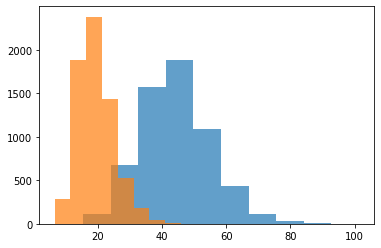

In [ ]:
plt.hist(listnew0, alpha=0.7);
plt.hist(listnew1, alpha=0.7);

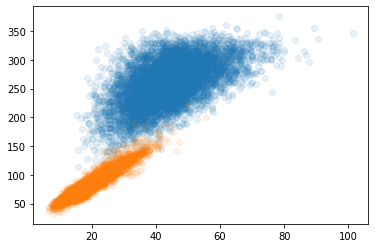

In [ ]:
plt.scatter(listnew0, hull0, alpha=0.1)
plt.scatter(listnew1, hull1, alpha=0.1)

**Part 2 Answer 4**
**Will these features work for different classes other than 0 and 1?**

In case of numbers other than 0 and 1 the features work but when we try with 8,2,7,3,6 the results are not at all good. this may be due to the fact that some number when handwritten are very similar to other numbers, 
-> like we have 1, 7, 2 these three when handwritten are very similar to each other like features for 1 will coincide with 7 and 2 as we can make 7 and 2 from 1, similarly 2 can be made extending 7.
-> 0,9,6 are also similar to a lot of extent.

In [ ]:
no0 = train_X[train_y==0,:,:]
no2 = train_X[train_y==2,:,:]

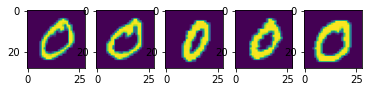

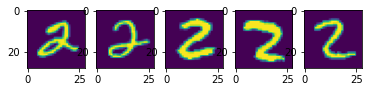

In [ ]:
for i in range(5):
  plt.subplot(1,5, i+1)
  plt.imshow(no0[i,:,:])
plt.show()
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(no2[i,:,:])
plt.show()

In [ ]:
sum0 = np.sum(no0>0, (1,2))
sum2 = np.sum(no2>0, (1,2))

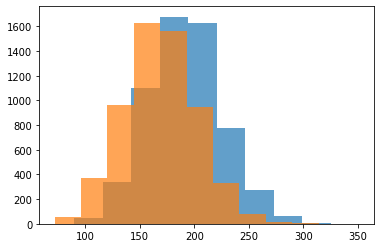

In [ ]:
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

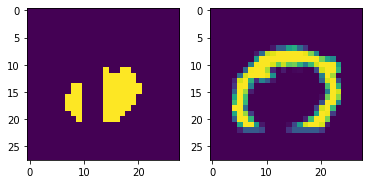

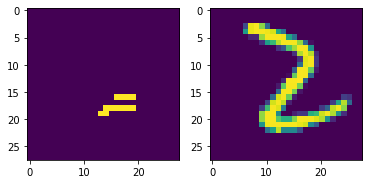

In [ ]:
imgs = [no0[456,:,:], no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

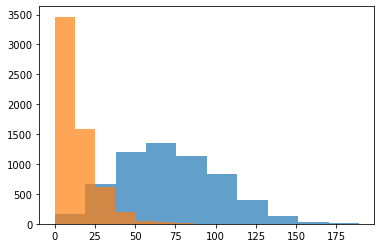

In [ ]:
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole2 = np.array([getHolePixels(i).sum() for i in no2])

plt.hist(hole0, alpha=0.7);
plt.hist(hole2, alpha=0.7);

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

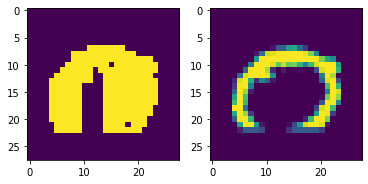

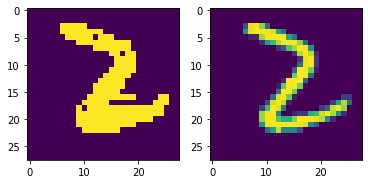

In [ ]:
imgs = [no0[456,:,:], no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

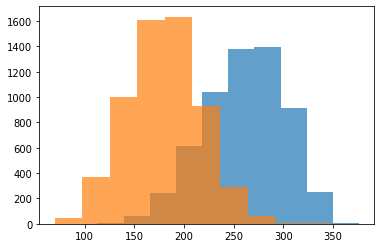

In [ ]:
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull2 = np.array([getHullPixels(i).sum() for i in no2])

plt.hist(hull0, alpha=0.7);
plt.hist(hull2, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

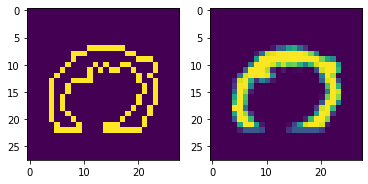

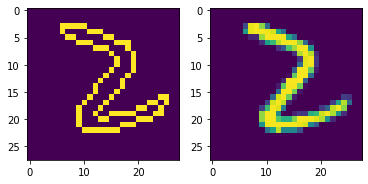

In [ ]:
imgs = [no0[456,:,:], no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

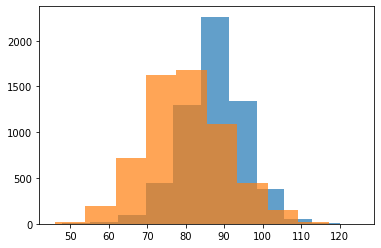

In [ ]:
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])

plt.hist(bound0, alpha=0.7);
plt.hist(bound2, alpha=0.7);

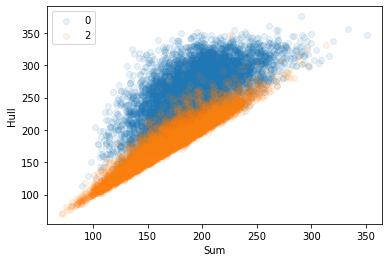

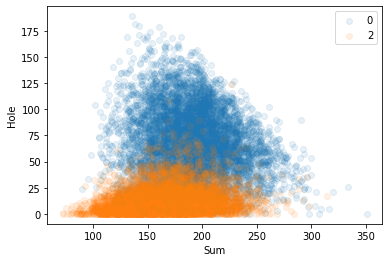

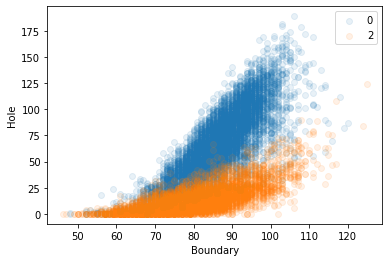

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum2, hull2, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','2'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum2, hole2, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','2'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound2, hole2, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','2'])
plt.show()

In [ ]:
cl0 = ['class 0']*len(sum0)
cl2 = ['class 2']*len(sum2)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole2)), np.concatenate((sum0,sum2)), 
                           np.concatenate((bound0,bound2)), np.concatenate((cl0,cl2)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

here the combination of hole, sum and boundary works well but the other combinations do not work that well.
in case of using the image of 8 we can observe that the features are over each other making it very hard to differentiate the values. So the features we have do not necessarily work for all the numbers but can work for some combinations.

**Part 2 Answer 5**
**What will happen if we take more that two classes at a time?**

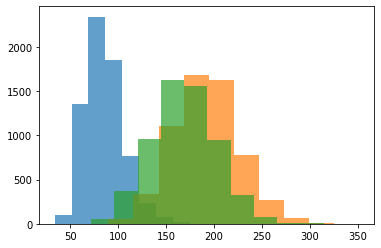

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]
no2 = train_X[train_y==2,:,:]

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum2 = np.sum(no2>0, (1,2))

plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);

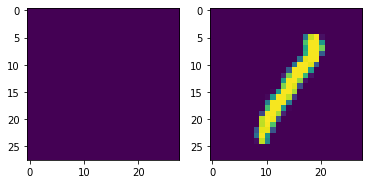

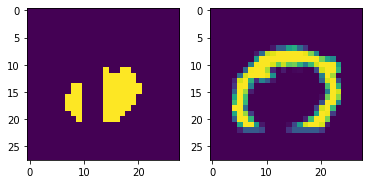

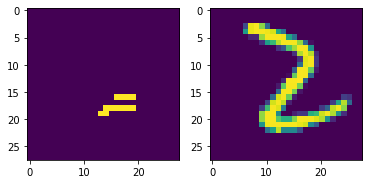

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

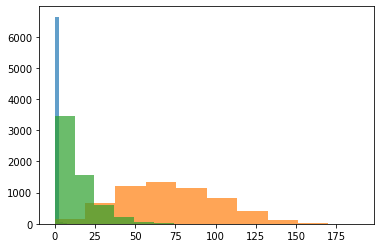

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole2 = np.array([getHolePixels(i).sum() for i in no2])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(hole2, alpha=0.7);

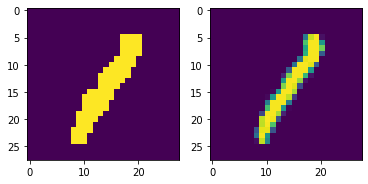

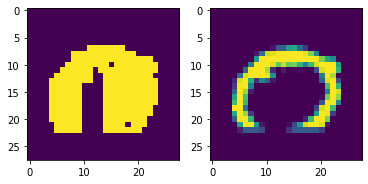

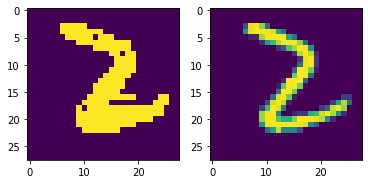

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

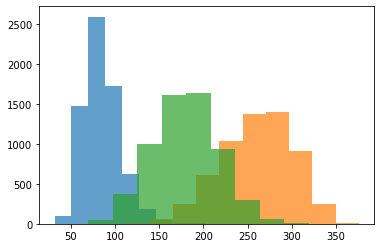

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull2 = np.array([getHullPixels(i).sum() for i in no2])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);
plt.hist(hull2, alpha=0.7);

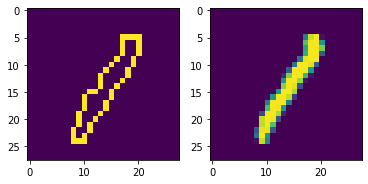

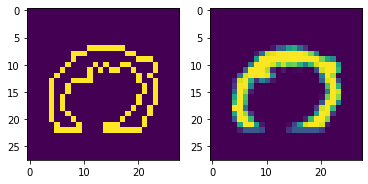

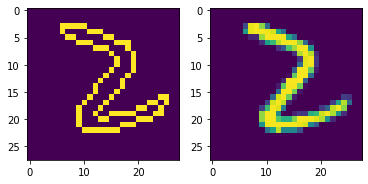

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:], no2[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

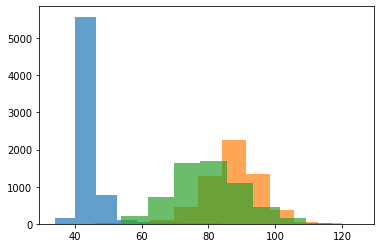

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(bound2, alpha=0.7);

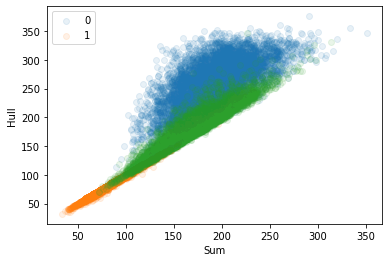

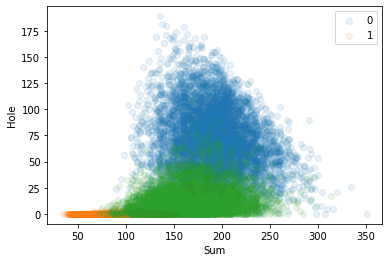

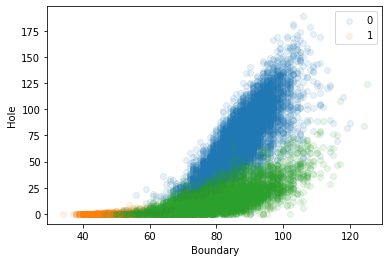

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.scatter(sum2, hull2, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.scatter(sum2, hole2, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.scatter(bound2, hole2, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
cl2 = ['class 2']*len(sum2)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0, hole2)), np.concatenate((sum1,sum0,sum2)), 
                           np.concatenate((bound1,bound0,bound2)), np.concatenate((cl1, cl0,cl2)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()